# Quel est le temps moyen passé aux pit-stops par année ?

## Code 

* Question traitée avec pandas

In [23]:
import pandas as pd

pit_stops = pd.read_csv('C:/DEVOIRS/ENSAI1A/projet-info/data/pit_stops.csv')
races = pd.read_csv('C:/DEVOIRS/ENSAI1A/projet-info/data/races.csv')

jointure = pd.merge(pit_stops, races, on='raceId', how='left')
jointure

name = 'Australian Grand Prix'

temps_moyen_pit_stops = jointure[jointure['name'] == name].groupby('year')['milliseconds'].mean()
temps_moyen_pit_stops


year
2011     24342.822222
2012     24706.926829
2013     23119.905660
2014     23856.441176
2015     25012.588235
2016    445759.600000
2017     24080.800000
2018     22316.750000
2019     23607.727273
2022     18541.681818
2023    817726.384615
2024     19716.055556
Name: milliseconds, dtype: float64

On convertit nos millisecondes en minutes:secondes.centiemes

In [24]:
def convert_to_human_readable(milliseconds):
    minutes = milliseconds // 60000
    seconds = (milliseconds % 60000) // 1000
    return f"{minutes}m {seconds}s"

temps_moyen_pit_stops_readable = temps_moyen_pit_stops.map(convert_to_human_readable)
temps_moyen_pit_stops_readable

year
2011     0.0m 24.0s
2012     0.0m 24.0s
2013     0.0m 23.0s
2014     0.0m 23.0s
2015     0.0m 25.0s
2016     7.0m 25.0s
2017     0.0m 24.0s
2018     0.0m 22.0s
2019     0.0m 23.0s
2022     0.0m 18.0s
2023    13.0m 37.0s
2024     0.0m 19.0s
Name: milliseconds, dtype: object

## Graphique

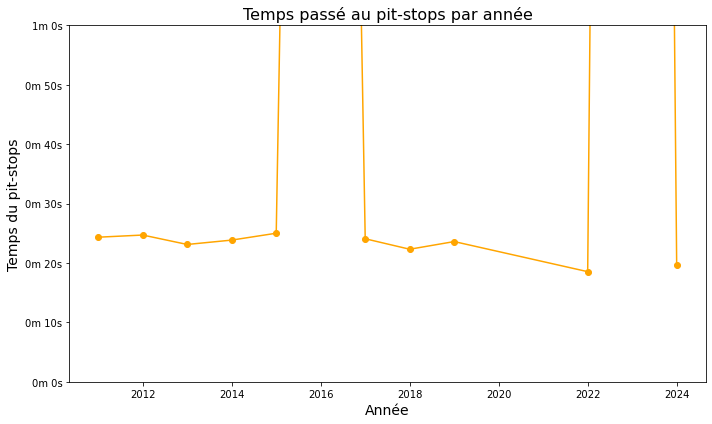

In [29]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def human_readable_formatter(x,pos):
    return convert_to_human_readable(int(x))

plt.figure(figsize=(10, 6))
temps_moyen_pit_stops.plot(
    x='year',
    y='milliseconds',
    marker="o",
    ylim=(0, 60000),
    color='orange'
)
plt.gca().yaxis.set_major_formatter(FuncFormatter(human_readable_formatter))
plt.title('Temps passé au pit-stops par année', fontsize=16)
plt.xlabel("Année", fontsize=14)
plt.ylabel("Temps du pit-stops", fontsize=14)
plt.tight_layout()